In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve ,auc

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('bank.csv')

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
#Checking Null Values



In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

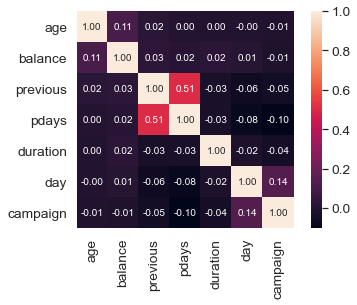

In [7]:
corrmat = df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'age')['age'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\geeth\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

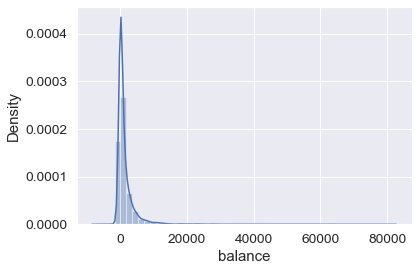

In [8]:
sns.distplot(df['balance'])



<AxesSubplot:>

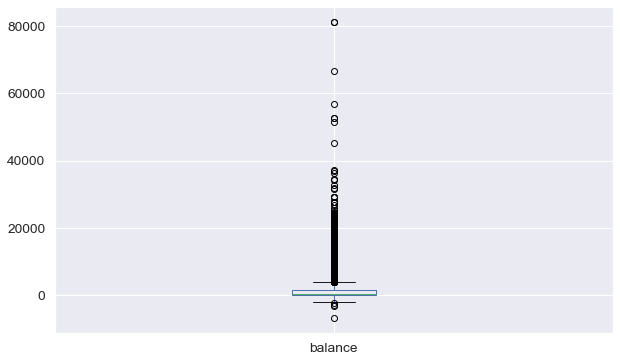

In [9]:
plt.figure(figsize=(10,6))
df.balance.plot(kind='box')

In [10]:
df.balance.describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [11]:
df.drop(df[df['balance']>1708].index,axis=0,inplace=True)

In [12]:
df.drop(df[df['balance']<122].index,axis=0,inplace=True)

C:\Users\geeth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

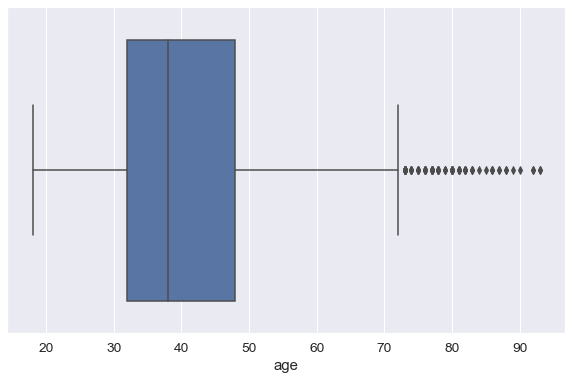

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(df['age'])

In [14]:
df['age'].describe()

count    5589.000000
mean       40.385758
std        11.693628
min        18.000000
25%        32.000000
50%        38.000000
75%        48.000000
max        93.000000
Name: age, dtype: float64

In [15]:
df.drop(df[df['age']>48].index,axis=0,inplace=True)

In [16]:
df.drop(df[df['age']<32].index,axis=0,inplace=True)

<AxesSubplot:>

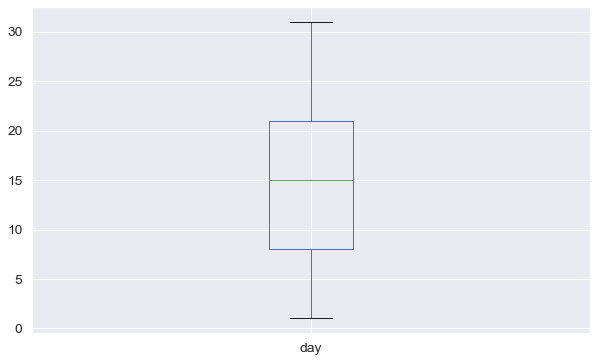

In [17]:
plt.figure(figsize=(10,6))
df.day.plot(kind='box')

In [18]:
df['day'].describe()

count    2896.000000
mean       15.275552
std         8.346845
min         1.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        31.000000
Name: day, dtype: float64

In [19]:
df.drop(df[df['day']>21].index,axis=0,inplace=True)

In [20]:
df.drop(df[df['day']>8].index,axis=0,inplace=True)

<AxesSubplot:>

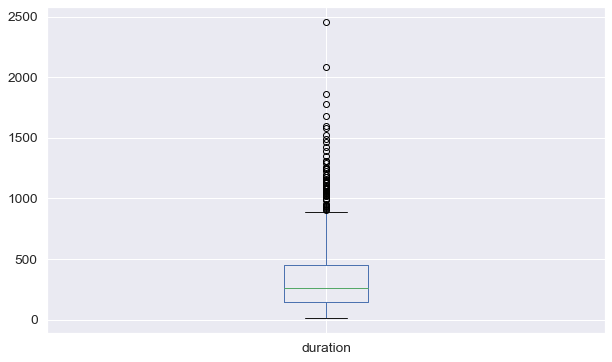

In [21]:
plt.figure(figsize=(10,6))
df.duration.plot(kind='box')

In [22]:
df['duration'].describe()

count     784.000000
mean      361.506378
std       324.108219
min         9.000000
25%       149.000000
50%       259.500000
75%       447.000000
max      2456.000000
Name: duration, dtype: float64

In [23]:
df.drop(df[df['duration']>290].index,axis=0,inplace=True)

In [24]:
df.drop(df[df['duration']<106].index,axis=0,inplace=True)

<AxesSubplot:>

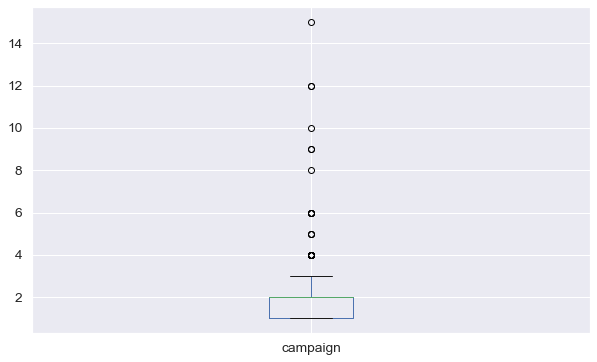

In [25]:
plt.figure(figsize=(10,6))
df.campaign.plot(kind='box')

In [26]:
df['campaign'].describe()

count    335.000000
mean       1.961194
std        1.670899
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max       15.000000
Name: campaign, dtype: float64

In [27]:
df.drop(df[df['campaign']>3].index,axis=0,inplace=True)

<AxesSubplot:>

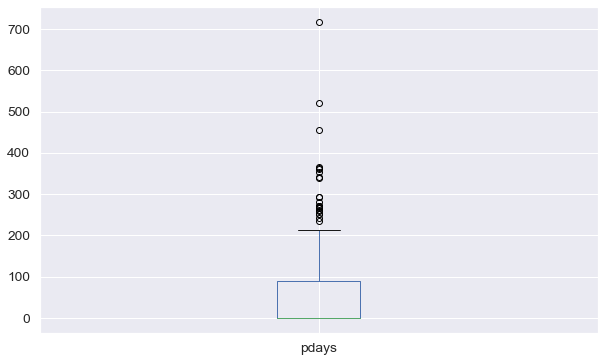

In [28]:
plt.figure(figsize=(10,6))
df.pdays.plot(kind='box')

In [29]:
df["pdays"].describe()

count    305.000000
mean      53.078689
std      102.339382
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       90.000000
max      717.000000
Name: pdays, dtype: float64

In [30]:
df.drop(df[df['pdays']>92].index,axis=0,inplace=True)

<AxesSubplot:>

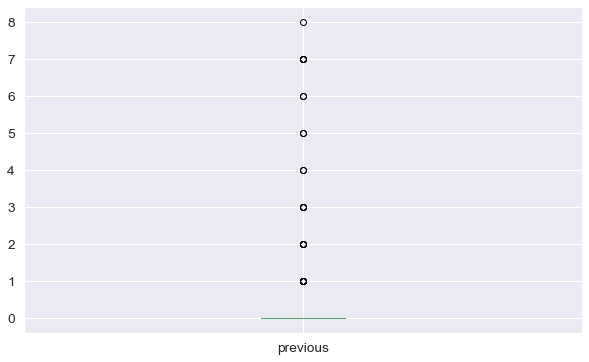

In [31]:
plt.figure(figsize=(10,6))
df.previous.plot(kind='box')

In [32]:
df['previous'].describe()

count    237.000000
mean       0.396624
std        1.360330
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: previous, dtype: float64

In [23]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


## Data Pre-Processing


In [34]:
def preprocessor(df):
    res_df=df.copy()
    le=preprocessing.LabelEncoder()
    res_df['job']=le.fit_transform(res_df['job'])
    res_df['marital']=le.fit_transform(res_df['marital'])
    res_df['education']=le.fit_transform(res_df['education'])
    res_df['default']=le.fit_transform(res_df['default'])
    res_df['housing']=le.fit_transform(res_df['housing'])
    res_df['loan']=le.fit_transform(res_df['loan'])
    res_df['contact']=le.fit_transform(res_df['contact'])
    res_df['month']=le.fit_transform(res_df['month'])
    res_df['poutcome']=le.fit_transform(res_df['poutcome'])
    res_df['deposit']=le.fit_transform(res_df['deposit'])
    return res_df
    

In [35]:
encoded_df=preprocessor(df)
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
207,35,4,1,2,0,867,1,0,2,2,5,230,3,-1,0,3,1
1131,36,4,1,2,0,630,0,0,0,2,2,285,1,-1,0,3,1
1147,41,1,1,0,0,201,1,0,0,3,2,157,1,-1,0,3,1
1156,32,9,2,2,0,1246,1,0,0,4,2,192,2,-1,0,3,1
1176,33,1,1,1,0,315,0,0,0,4,2,146,3,-1,0,3,1


In [48]:
x=encoded_df.iloc[:,:-1].values
y=encoded_df['deposit'].values



In [37]:
## Split Data into Train and Test data sets

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [39]:
## Build Decision Tree Model

### Decision Tree with Cart(Gini)

###### Decision Tree with depth 2

model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_tarin = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Trining Score',model_dt_2_score_tarin)

print('Testing Score',model_dt_2_score_test)

###### Decision Tree with depth 4

model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_tarin = model_dt_4.score(x_train,y_train)

model_dt_4_score_test = model_dt_4.score(x_test,y_test)

print('Trining Score',model_dt_4_score_tarin)

print('Testing Score',model_dt_4_score_test)

###### Decision Tree with depth 6

model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train,y_train)

model_dt_6_score_tarin = model_dt_6.score(x_train,y_train)

model_dt_6_score_test = model_dt_6.score(x_test,y_test)

print('Trining Score',model_dt_6_score_tarin)

print('Testing Score',model_dt_6_score_test)

###### Decision Tree with depth 8

model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_tarin = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Trining Score',model_dt_8_score_tarin)

print('Testing Score',model_dt_8_score_test)

### Decision Tree with c4.5(entropy)

model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(x_train,y_train)

y_pred_dt = model_dt.predict_proba(x_test)[:,1]
# y_pred_dt

model_dt_score_train = model_dt.score(x_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(x_test,y_test)
print(model_dt_score_test)

Trining Score 0.8306878306878307
Testing Score 0.6666666666666666
Trining Score 0.91005291005291
Testing Score 0.75
Trining Score 0.9470899470899471
Testing Score 0.7291666666666666
Trining Score 0.9841269841269841
Testing Score 0.7083333333333334
0.8306878306878307
0.6666666666666666


In [40]:
## Build Decision Tree Model

### Decision Tree with Cart(Gini)

###### Decision Tree with depth 2

model_dt_2=DecisionTreeClassifier(random_state=1,max_depth=2)
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train=model_dt_2.score(x_train,y_train)
model_dt_2_score_test=model_dt_2.score(x_test,y_test)
print('Training Score',model_dt_2_score_train)
print('Training Score',model_dt_2_score_test)

Training Score 0.8306878306878307
Training Score 0.6666666666666666


In [41]:
###### Decision Tree with depth 4
model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(x_train,y_train)
model_dt_4_score_train=model_dt_4.score(x_train,y_train)
model_dt_4_score_test=model_dt_4.score(x_test,y_test)
print('Training Score',model_dt_4_score_train)
print('Training Score',model_dt_4_score_test)

Training Score 0.91005291005291
Training Score 0.75


In [42]:
###### Decision Tree with depth 8
model_dt_8=DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt_8.fit(x_train,y_train)
model_dt_8.fit(x_test,y_test)
model_dt_8_score_train=model_dt_8.score(x_train,y_train)
model_dt_8_score_test=model_dt_8.score(x_test,y_test)
print('Training Score',model_dt_8_score_train)
print('Training Score',model_dt_8_score_test)

Training Score 0.6402116402116402
Training Score 1.0


In [82]:
model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(x_train,y_train)

y_pred_dt = model_dt.predict(x_test)

y_pred_dt



array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0])

In [83]:
### Decision Tree with c4.5(entropy)

model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:,1]


model_dt_score_train = model_dt.score(x_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(x_test,y_test)
print(model_dt_score_test)

0.8306878306878307
0.6666666666666666


In [70]:
## Performance metrics





In [84]:
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)
roc_auc_dt


0.631868131868132

In [76]:
## Area under curve




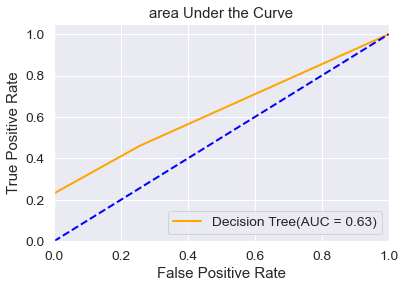

In [86]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")
